In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('1730285881-Airbnb_Open_Data.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [3]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [4]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


Cleaning the data

In [5]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules','license'],axis=1,inplace=True)
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)
df['price']=df['price'].str.replace(',','',regex=False)

df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'
},inplace=True)

df.dropna(inplace=True)


In [6]:
#change mismathched data
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

#correct the spelling
df.loc[df['neighbourhood group']=='Brookln','neighbourhood group']='Brooklyn'
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'
#remove outliers
df=df.drop(df[df['availability 365']>500].index)

In [7]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

EDA==>Exploratory data analysis

In [9]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [10]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property types and counts in datasets')

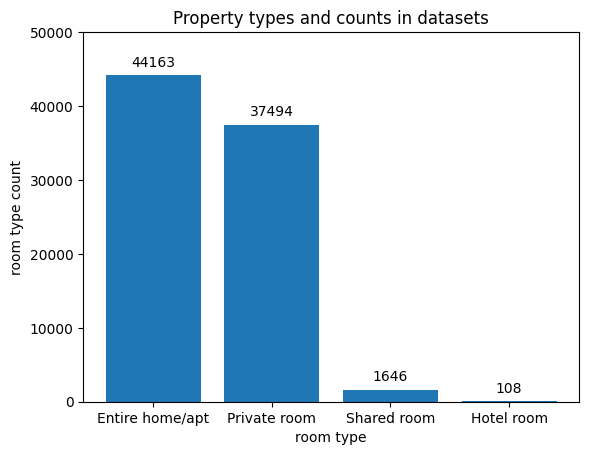

In [11]:
room=plt.bar(property_types.index,property_types.loc[:,"count"])
plt.bar_label(room,labels=property_types.loc[:,"count"],padding=4)
plt.ylim(([0,50000]))
plt.xlabel('room type')
plt.ylabel('room type count')
plt.title('Property types and counts in datasets')

highest numbers of listings

In [12]:
hood_grp=df['neighbourhood group'].value_counts().to_frame()
hood_grp

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'highest number of listings')

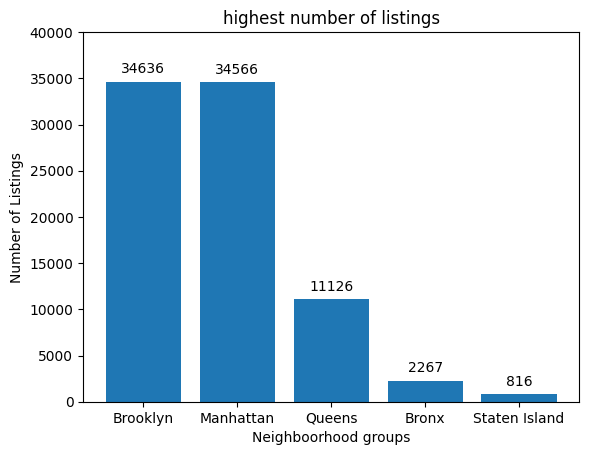

In [13]:
hood=plt.bar(hood_grp.index,hood_grp.loc[:,"count"])
plt.bar_label(hood,labels=hood_grp.loc[:,"count"],padding=4)
plt.ylim(([0,40000]))
plt.xlabel('Neighboorhood groups')
plt.ylabel('Number of Listings')
plt.title('highest number of listings')

which neighbourhood grps have the highest avg prices for listings?

Text(0.5, 1.0, 'which neighbourhood grps have the highest avg prices for listings?')

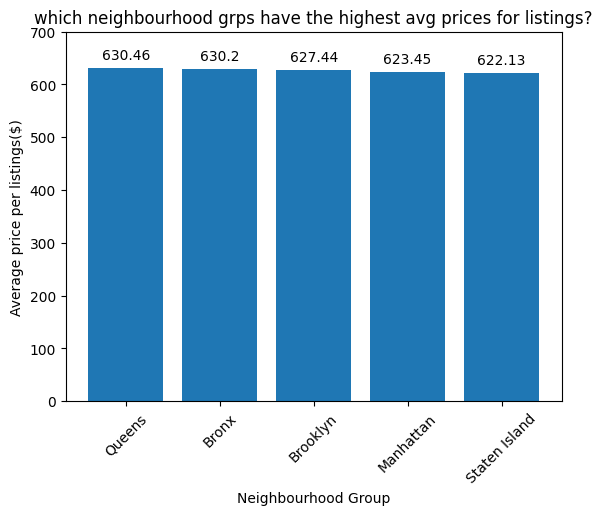

In [14]:
avg=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_bar=plt.bar(avg.index,avg.loc[:,'price_$'])
plt.bar_label(avg_bar,labels=round(avg.loc[:,'price_$'],2),label_type='edge',padding=4)
plt.ylim([0,700])
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average price per listings($)")
plt.xticks(rotation=45)
plt.title("which neighbourhood grps have the highest avg prices for listings?")

Text(0.5, 1.0, 'relationship b\\w the construction year of property and price')

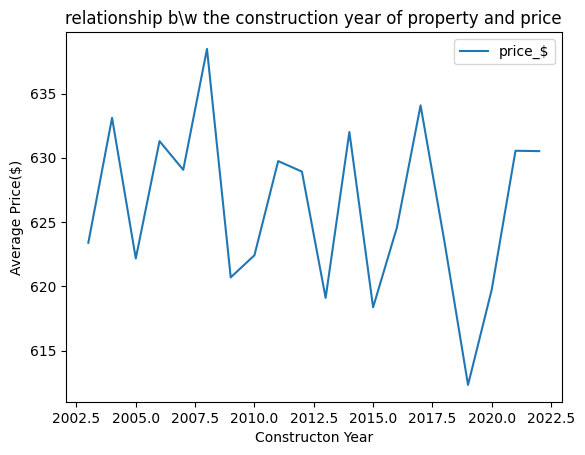

In [15]:
# the relationship b\w the construction year of property and price
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Constructon Year')
plt.ylabel('Average Price($)')
plt.title('relationship b\w the construction year of property and price')

Text(0.5, 1.0, 'Top 10 hosts by calculated host listings count')

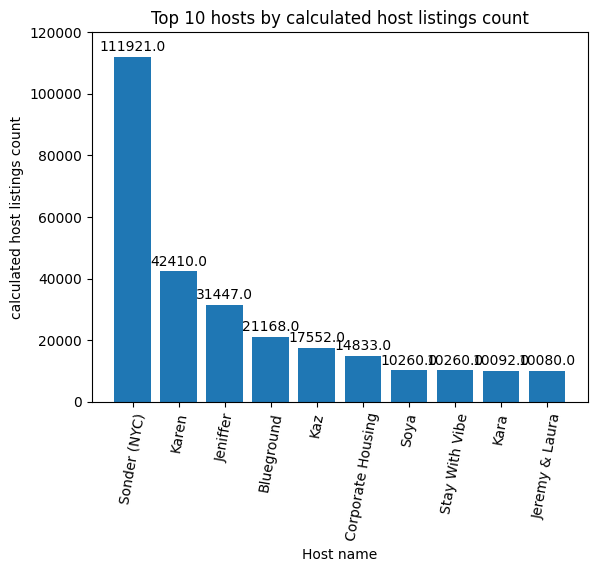

In [18]:
#Top 10 hosts by calculated host listings count
host=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
host_bar=plt.bar(host.index,host.loc[:,'calculated host listings count'])
plt.bar_label(host_bar,labels=round(host.loc[:,'calculated host listings count'],2),label_type='edge',padding=2)
plt.ylim([0,120000])
plt.xlabel("Host name")
plt.ylabel("calculated host listings count")
plt.xticks(rotation=80)
plt.title("Top 10 hosts by calculated host listings count")

In [20]:
#Are hosts with verified identities more likely to recive +ve reviews?
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


Text(0.5, 1.0, 'Average Review rate for each verification stats')

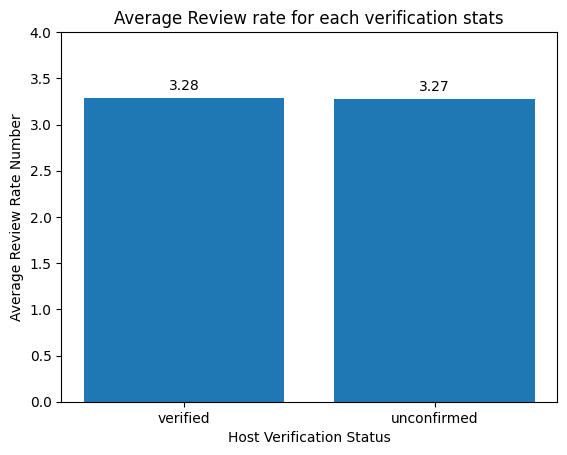

In [21]:
r_bar=plt.bar(review.index,review.loc[:,'review rate number'])
plt.bar_label(r_bar,labels=round(review.loc[:,'review rate number'],2),label_type='edge',padding=4)
plt.ylim([0,4])
plt.xlabel("Host Verification Status")
plt.ylabel("Average Review Rate Number")
plt.title("Average Review rate for each verification stats")

Text(0.5, 1.0, "correlation b/w the price of a listing and it's service fees")

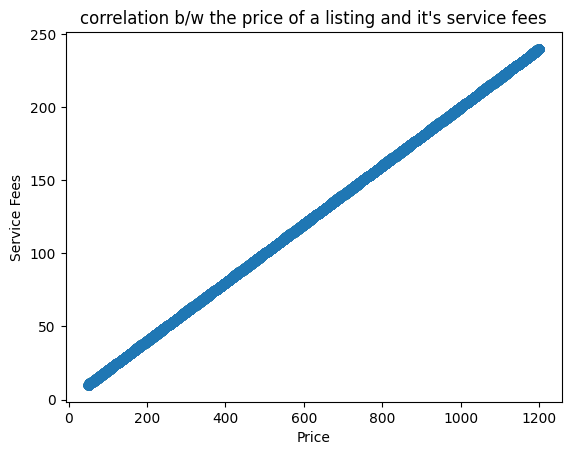

In [22]:
#correlation b/w the price of a listing and it's service fees
import seaborn as sns
df['price_$'].corr(df['service_fee_$'])
sns.regplot(df,x='price_$',y='service_fee_$')
plt.xlabel('Price')
plt.ylabel('Service Fees')
plt.title('correlation b/w the price of a listing and it\'s service fees')

In [23]:
#what is review rate number for listing and does it vary based on the neighbourhood grp and room type
arn=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
arn

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review rate for each room/property type in each neighbourhood grp')

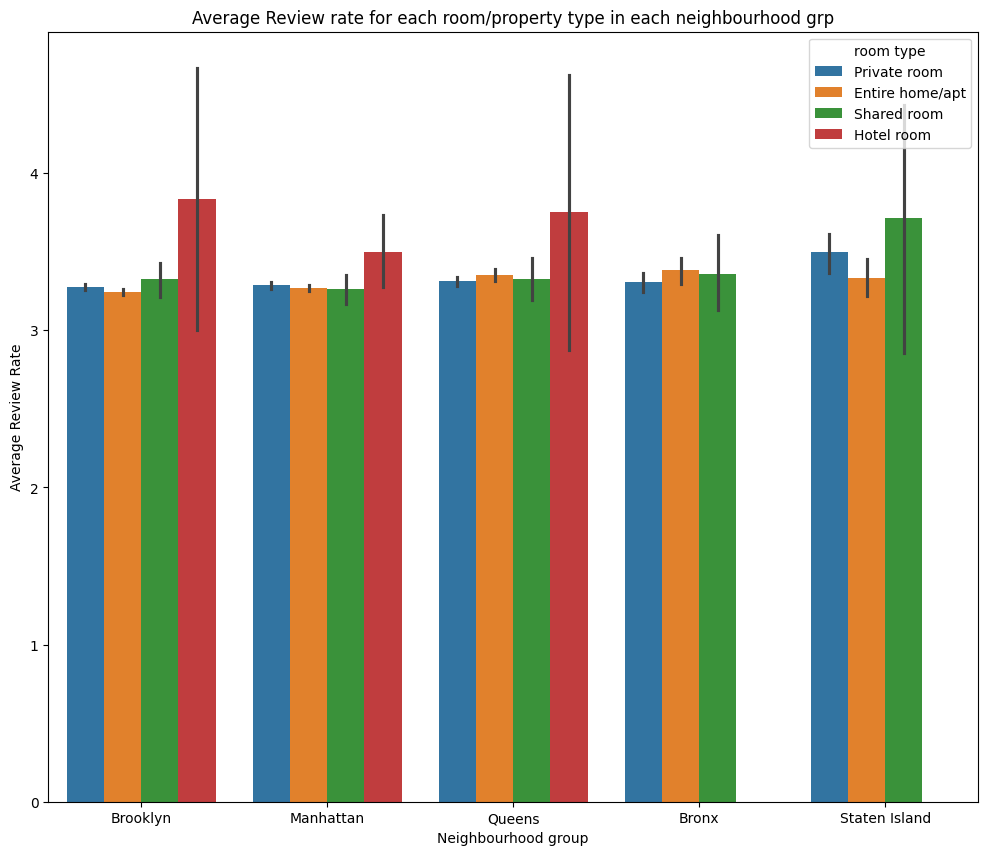

In [25]:
plt.figure(figsize=[12,10])
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel("Neighbourhood group")
plt.ylabel("Average Review Rate")
plt.title("Average Review rate for each room/property type in each neighbourhood grp")

Text(0.5, 1.0, 'hosts with higher calculated host calculated host listings count more likely to maintain higher availibility throughout the year')

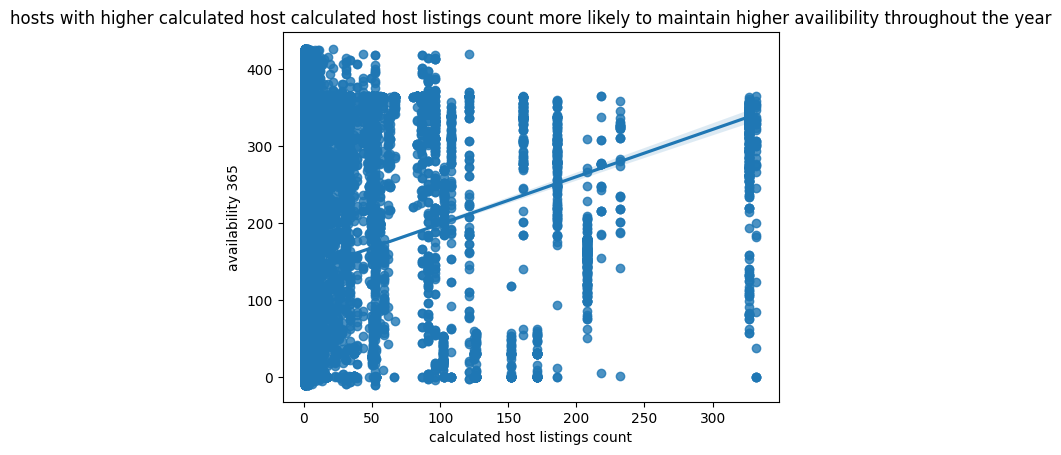

In [26]:
#are hosts with higher calculated host calculated host listings count more likely to maintain higher availibility throughout the year
sns.regplot(df,x='calculated host listings count',y='availability 365')
plt.xlabel('calculated host listings count')
plt.ylabel('availability 365')
plt.title('hosts with higher calculated host calculated host listings count more likely to maintain higher availibility throughout the year')

In [28]:
#correlation =+ve and weak
df['calculated host listings count'].corr(df['availability 365'])

0.13598552736758687